## Accuracy
- Percentage of Correct Predictions

In [42]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, 
                             precision_score, recall_score,
                             f1_score, precision_recall_fscore_support, 
                            confusion_matrix)

from yellowbrick.classifier import (ClassificationReport, 
                                   DiscriminationThreshold)

In [5]:
data = pd.read_csv('./data/kdd2004.csv')
data['target']=data['target'].map({-1:0,1:1})

In [6]:
data.shape

(145751, 75)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,267.2,0.52,0.05,-2.36,49.6,...,72.5,0.47,0.74,-11.0,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,521.6,-1.08,0.58,-0.02,-3.2,...,45.0,0.58,0.41,-19.0,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,621.0,-1.20,0.14,-0.20,73.6,...,82.3,0.47,-0.19,-10.0,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,560.9,-0.29,-0.10,-1.11,124.3,...,255.9,-0.46,1.57,10.0,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,98.1,1.09,-0.33,-2.16,-3.9,...,30.1,0.80,-0.24,5.0,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [8]:
data['target'].value_counts()

0    144455
1      1296
Name: target, dtype: int64

In [10]:
# Imbalanced ration

data.target.value_counts()/len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [11]:
# Train & test data

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis = 1), 
                                                    data['target'],test_size=0.3,random_state=0)

In [12]:
X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [13]:
# Base line model always predict zero or majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML Model 

### Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=-1)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [20]:
rf.predict_proba(X_train)

array([[0.99620636, 0.00379364],
       [0.99660927, 0.00339073],
       [0.99660927, 0.00339073],
       ...,
       [0.99660927, 0.00339073],
       [0.99660927, 0.00339073],
       [0.99660927, 0.00339073]])

In [21]:
 rf.predict_proba(X_train)[:,1]

array([0.00379364, 0.00339073, 0.00339073, ..., 0.00339073, 0.00339073,
       0.00339073])

In [25]:
print('BaseLine Test', accuracy_score(y_test, y_test_base))
print('RandomForest', accuracy_score(y_test, rf.predict(X_test)))

BaseLine Test 0.9907377761514888
RandomForest 0.9962951104605955


### Baseline model that always predict the majority class hass similar accuracy compared to random forest

# Percentage of Minority class correctly classified

In [26]:
def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    minority_correct = np.sum(np.where((y_true==1)&(y_pred==1),1,0))
    return minority_correct / minority_total *100
    

In [27]:
print('% minority correctly classified, Baseline test: ', return_minority_perc(y_test, y_test_base))
print('% minority correctly classified, Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))


% minority correctly classified, Baseline test:  0.0
% minority correctly classified, Random Forest test: 60.24691358024692


# Precision - Recall - F1 - Support

**Precision** - From the total samples identified as positive by 
the model, how many of them were really positives? Hence an 
increase in precision is a reduction in the number of false 
positives. Again we want to maximize the Precision.

**Precision = TP/TP + FP - Of all the observations that were positive were detected positive**


**Recall** - Total number of positive examples that were correctly 
identified as positive by the model. Hence the increase in the 
recall decreases the probability of misclassifying a sample
from a minority class. Hence we always want to have a high 
recall rate.

**Recall = TP/TP + FN - Rate of positive class**

## Precision 

In [29]:
print('Precision Baseline Test', precision_score(y_test, y_test_base))
print('Precision RandomForest Test', precision_score(y_test, rf.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Baseline Test 0.0
Precision RandomForest Test 0.9959183673469387


## Recall

In [32]:
# telling system which is the minority calss that pos_label = 1
print('Recall Baseline Test', recall_score(y_test, y_test_base, pos_label=1))
print('Recall RandomForest Test', recall_score(y_test, rf.predict(X_test), pos_label=1))

Recall Baseline Test 0.0
Recall RandomForest Test 0.6024691358024692


## F1 Score

In [33]:
# telling system which is the minority calss that pos_label = 1
print('F1 Baseline Test', f1_score(y_test, y_test_base, pos_label=1))
print('F1 RandomForest Test', f1_score(y_test, rf.predict(X_test), pos_label=1))

F1 Baseline Test 0.0
F1 RandomForest Test 0.7507692307692309


## Full classification report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


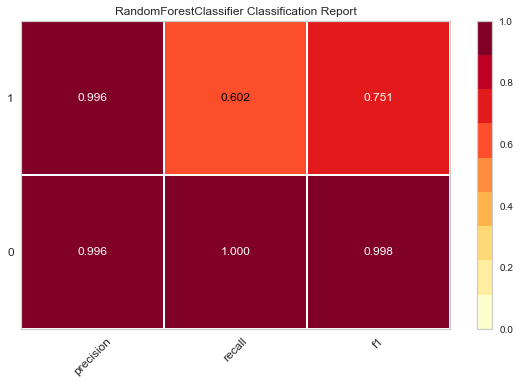

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [34]:
visualizer  = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class


Precision, Recall and therefore F-measure depend on the probability threshold utilised to determine the class output.

## Logistic Regression

In [35]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, rf.predict(X_test), pos_label=1,
)

print('Random Forests Precision: ', precision)
print('Random Forests Recall: ', recall)
print('Random Forests f-score: ', fscore)
print('Support: ', support)

Random Forests Precision:  [0.99629723 0.99591837]
Random Forests Recall:  [0.99997692 0.60246914]
Random Forests f-score:  [0.99813368 0.75076923]
Support:  [43321   405]


The first element in each list corresponds to the metrics for the majority class, the second element in each list corresponds to the metrics for the minority class (see that they coincide with those values obtained when we calculated the metrics individually).

See also that they match with the values obtained with Yellobrick below:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


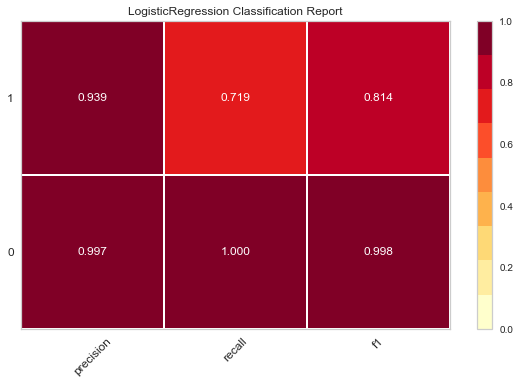

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [40]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Precision and Recall, vs probability threshold


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


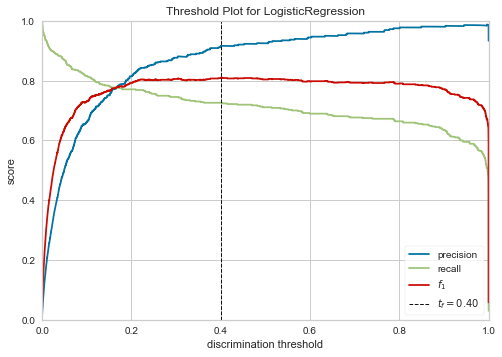

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [41]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# Confusion Matrix, False Positive & False Negative Rate


FPR = FP/(FP + TN)

FNR = FN/(TP + TN)

# Confusion Matrix

### Baseline Model

In [43]:
confusion_matrix(y_test, y_test_base)

array([[43321,     0],
       [  405,     0]], dtype=int64)

### Random Forest

In [45]:
confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])

array([[43320,     1],
       [  161,   244]], dtype=int64)

### Logistic Regression

In [46]:
confusion_matrix(y_test, logit.predict(X_test), labels=[0,1])

array([[43302,    19],
       [  114,   291]], dtype=int64)

## FPR & FNR

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

In [48]:
FPR = fp/(fp+tn)
FNR = fn/(fn+tp)
print('False Positive Rate, Random Forests: ', FPR)
print('False Negative Rate, Random Forests: ', FNR)

False Positive Rate, Random Forests:  2.3083492994159875e-05
False Negative Rate, Random Forests:  0.39753086419753086


In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, logit.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.00043858636688903763
False Negative Rate, Logistic Regression:  0.2814814814814815
